https://www.kaggle.com/ronitf/heart-disease-uci

In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_csv('heart.csv')


In [ ]:
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df1.target.unique()

array([1, 0])

_____________________________________________________________

**PREGUNTA**
1. En caso de aplicar un modelo lineal, ¿qué deberíamos emplear; una regresión lineal o logística?

In [ ]:
target = df1['target']
X = df1.drop(['target'],axis = 1)

Estandarizamos

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

*Aplica un método lineal*

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [ ]:
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(X_scaled, target, train_size=0.7)


In [ ]:
modelo = LogisticRegression()
modelo.fit(X = X_train_logistic, y = y_train_logistic)

LogisticRegression()

In [ ]:
y_pred_logistic = modelo.predict(X_test_logistic)

In [ ]:
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))

print("Accuracy:", modelo.score(X_test_logistic, y_test_logistic))

Intercept: [-0.05708884]
Coeficiente: [('age', -0.1666007690080467), ('sex', -1.042179203457704), ('cp', 0.9819004938774805), ('trestbps', -0.20767588033112955), ('chol', -0.29176244777918625), ('fbs', -0.16632313160826415), ('restecg', 0.1743350318309574), ('thalach', 0.4902485509976589), ('exang', -0.4794075858196467), ('oldpeak', -0.46096641246438924), ('slope', 0.4905622059532525), ('ca', -0.8692876683147899), ('thal', -0.6115527900960586)]
Accuracy: 0.8241758241758241


**PREGUNTA**
2. ¿Cuál es el coeficiente para la variable 'exang'?
3. ¿Que accuracy obtenemos?

In [ ]:
predicciones = modelo.predict_proba(X = X_test_logistic)
predicciones = pd.DataFrame(predicciones, columns = modelo.classes_)
predicciones.head(5)

,0,1
0,0.812149,0.187851
1,0.992645,0.007355
2,0.726218,0.273782
3,0.032902,0.967098
4,0.987381,0.012619


**PREGUNTA**
4. ¿Qué % tiene la segunda muestra (fila 3) para la clase 0?

*Aplica SVM*

In [ ]:
X_train_SVM, X_test_SVM, y_train_SVM, y_test_SVM = train_test_split(X_scaled, target, train_size=0.7)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear')
clf.fit(X_train_SVM,y_train_SVM)
y_pred_SVM = clf.predict(X_test_SVM)
print(accuracy_score(y_test_SVM,y_pred_SVM))

0.8461538461538461


**PREGUNTA**
5. ¿Qué accuracy obtenemos mediante SVM?

*Decision Tree*

In [ ]:
X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split(X_scaled, target, train_size=0.7)

In [ ]:
! pip install graphviz

In [ ]:
from sklearn import tree
import graphviz 

In [ ]:
clf = tree.DecisionTreeClassifier(random_state=0)
#Entrenamos
clf = clf.fit(X_train_DT, y_train_DT)

In [ ]:
y_pred_DT = clf.predict(X_test_DT)

In [ ]:
print("Accuracy:", modelo.score(X_test_DT, y_test_DT))

Accuracy: 0.8461538461538461


[Text(0.5, 0.875, 'X[2] <= -0.453\ngini = 0.499\nsamples = 212\nvalue = [102, 110]'),
 Text(0.25, 0.625, 'X[11] <= -0.225\ngini = 0.384\nsamples = 108\nvalue = [80, 28]'),
 Text(0.125, 0.375, 'X[12] <= 0.305\ngini = 0.5\nsamples = 51\nvalue = [26, 25]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'X[0] <= 1.007\ngini = 0.1\nsamples = 57\nvalue = [54, 3]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'X[11] <= -0.225\ngini = 0.334\nsamples = 104\nvalue = [22, 82]'),
 Text(0.625, 0.375, 'X[9] <= 0.57\ngini = 0.195\nsamples = 73\nvalue = [8, 65]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'X[9] <= -0.466\ngini = 0.495\nsamples = 31\nvalue = [14, 17]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

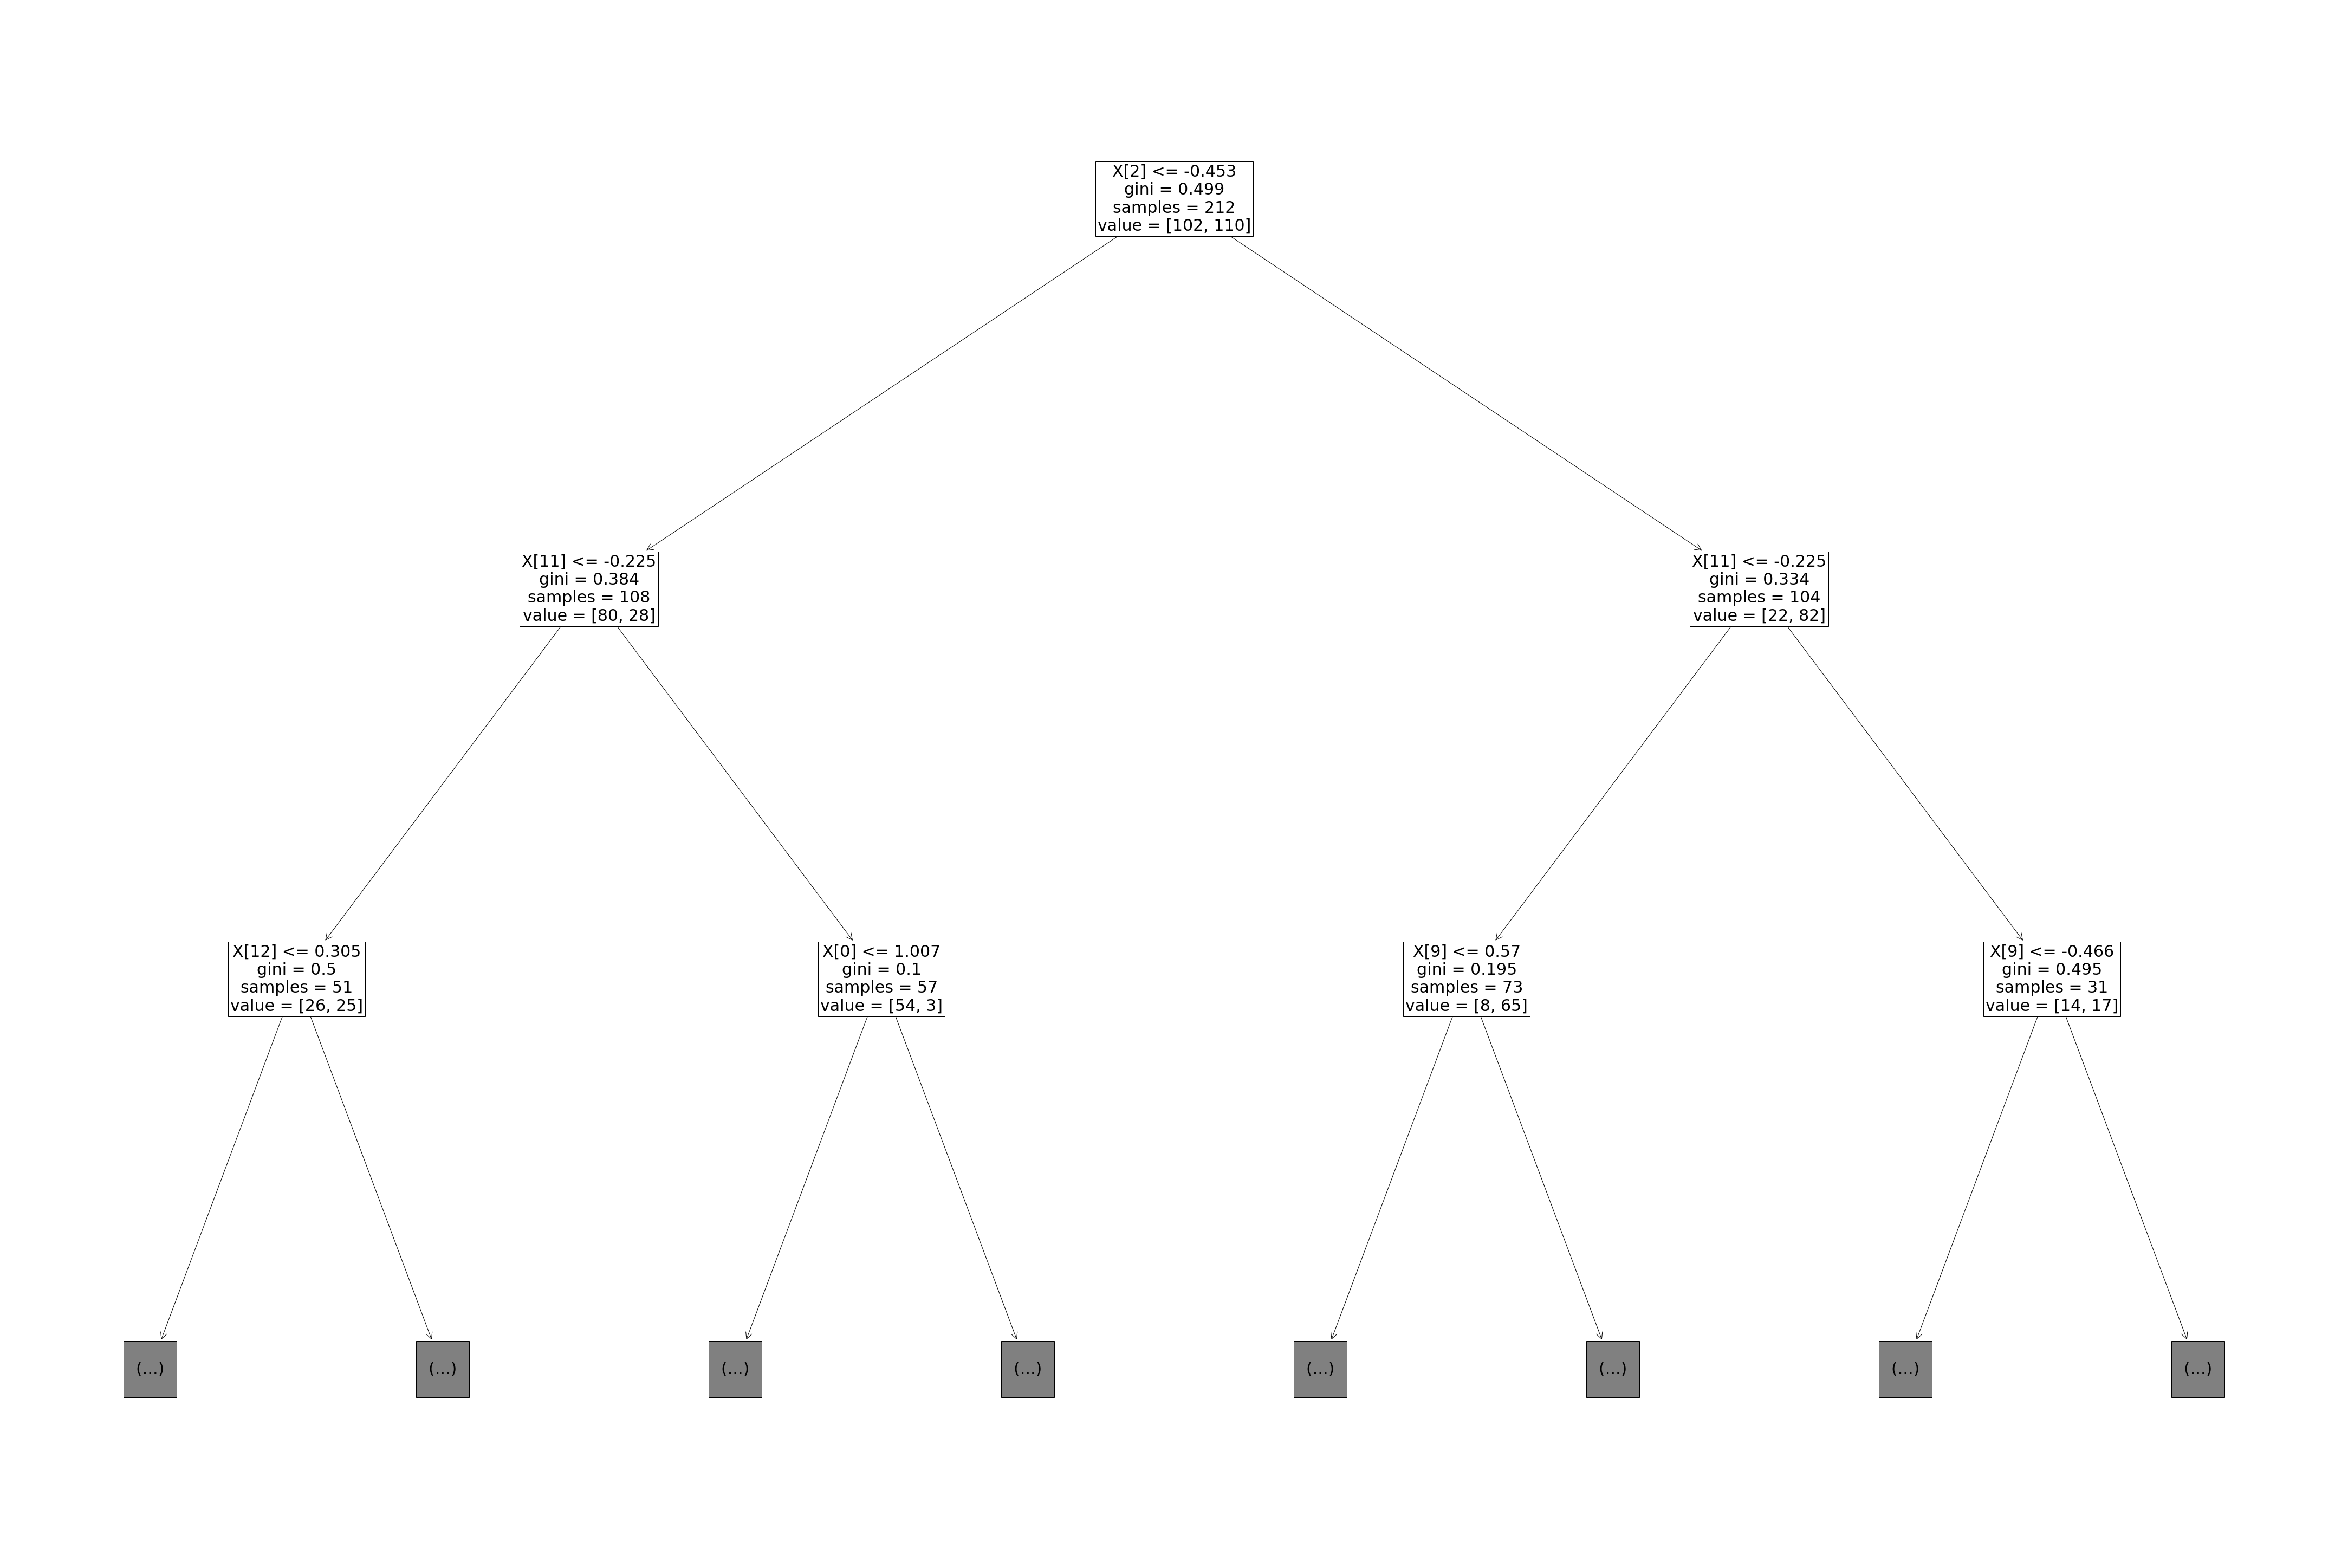

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,10,10])
tree.plot_tree(clf,fontsize=30,ax=ax,max_depth=2) 

**PREGUNTA**
6. Del segundo al tercer nivel, ¿mejora la métrica *gini* en todos los casos?

In [ ]:
df1['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

*Precision* cuantos pacientes hemos estimado correctamente que tienen un problema de corazón (TP) respecto el total de los que hemos estimado que lo tienen (TP+FP)

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
precision_score(y_test_logistic, y_pred_logistic, average='binary')

0.7906976744186046

In [ ]:
precision_score(y_test_SVM, y_pred_SVM, average='binary')

0.7692307692307693

In [ ]:
precision_score(y_test_DT, y_pred_DT, average='binary')

0.6909090909090909

*Recall* cuantos pacientes hemos estimado que tienen problemas de corazón correctamente (TP) teniendo en cuenta los que si lo tienen y los que lo tienen pero se han clasificado como que no (FN) -> **NOS INTERESA**

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
recall_score(y_test_logistic, y_pred_logistic, average='binary')

0.918918918918919

In [ ]:
recall_score(y_test_SVM, y_pred_SVM, average='binary')

0.9523809523809523

In [ ]:
recall_score(y_test_DT, y_pred_DT, average='binary')

0.8444444444444444

**PREGUNTA** Si lo que nos interesa es acertar bien los que tienen problemas de corazón, aunque detectemos algunos que no lo sean. (De esta manera evitamos que aquellos que si que tienen problemas no los perdamos) 
7. ¿Qué métrica debemos analizar? ¿Encontramos alguna diferencia entre el modelo que era mejor por accuracy que el modelo que es mejor en base a esta definición?
